# Importing required libraries

In [1]:
#LOADING THE DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reading the dataset

In [82]:
crp_production=pd.read_csv('crop production data.csv')
crp_production.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut 1254.00     2000.00  
1  Other Kharif pulses    2.00        1.00  
2                 Rice  102.00      321.00  
3               Banana  176.00      641.00  
4            Cashewnut  720.00      165.00

In [83]:
crp_production.shape

(246091, 7)

## Understanding the data

In [84]:
crp_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [92]:
df=crp_production.copy()

## Pre-processing of data

## Checking for null values,


In [85]:
crp_production.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

## Dealing with null values,

In [86]:
crp_production=crp_production.dropna()

In [87]:
crp_production.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

## Dealing with null values,

In [169]:
df[df['Production'].isna()]

Empty DataFrame
Columns: [State_Name, District_Name, Crop_Year, Season, Crop, Area, Production, Yield]
Index: []

## Checking for duplicates,

In [170]:
df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

In [88]:
crp_production.describe()

Crop_Year       Area    Production
count  242361.00  242361.00     242361.00
mean     2005.63   12167.41     582503.44
std         4.96   50857.44   17065813.17
min      1997.00       0.10          0.00
25%      2002.00      87.00         88.00
50%      2006.00     603.00        729.00
75%      2010.00    4545.00       7023.00
max      2015.00 8580100.00 1250800000.00

## State and Union Territory,

In [172]:
df['State_Name'].nunique()

33

In [174]:
df['State_Name'].value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

# Total Crop Production Over the Years

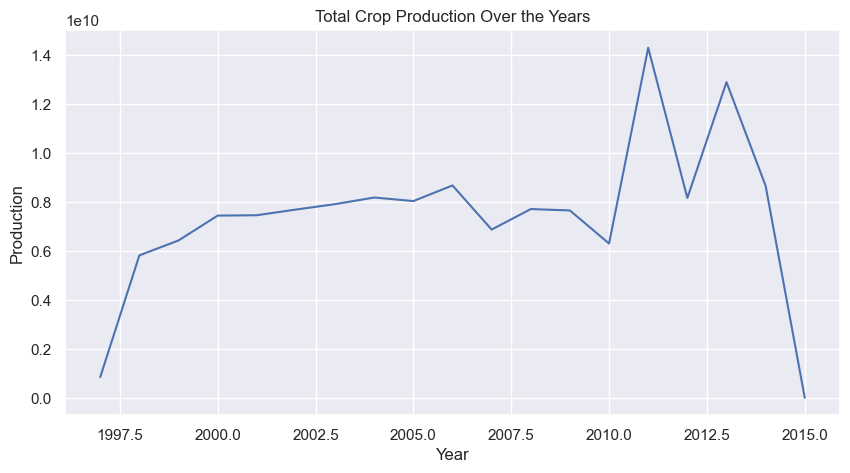

In [89]:
plt.figure(figsize=(10, 5))
crp_production.groupby('Crop_Year')['Production'].sum().plot(kind='line')  
plt.title('Total Crop Production Over the Years')
plt.xlabel('Year')  
plt.ylabel('Production') 
plt.show() 

In [90]:
crp_production['Yield']=crp_production['Production']/crp_production['Area']

In [91]:
crp_production.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  Yield  
0             Arecanut 1254.00     2000.00   1.59  
1  Other Kharif pulses    2.00        1.00   0.50  
2                 Rice  102.00      321.00   3.15  
3               Banana  176.00      641.00   3.64  
4            Cashewnut  720.00      165.00   0.23

# State and Union Territory VS Production in tonnes# 

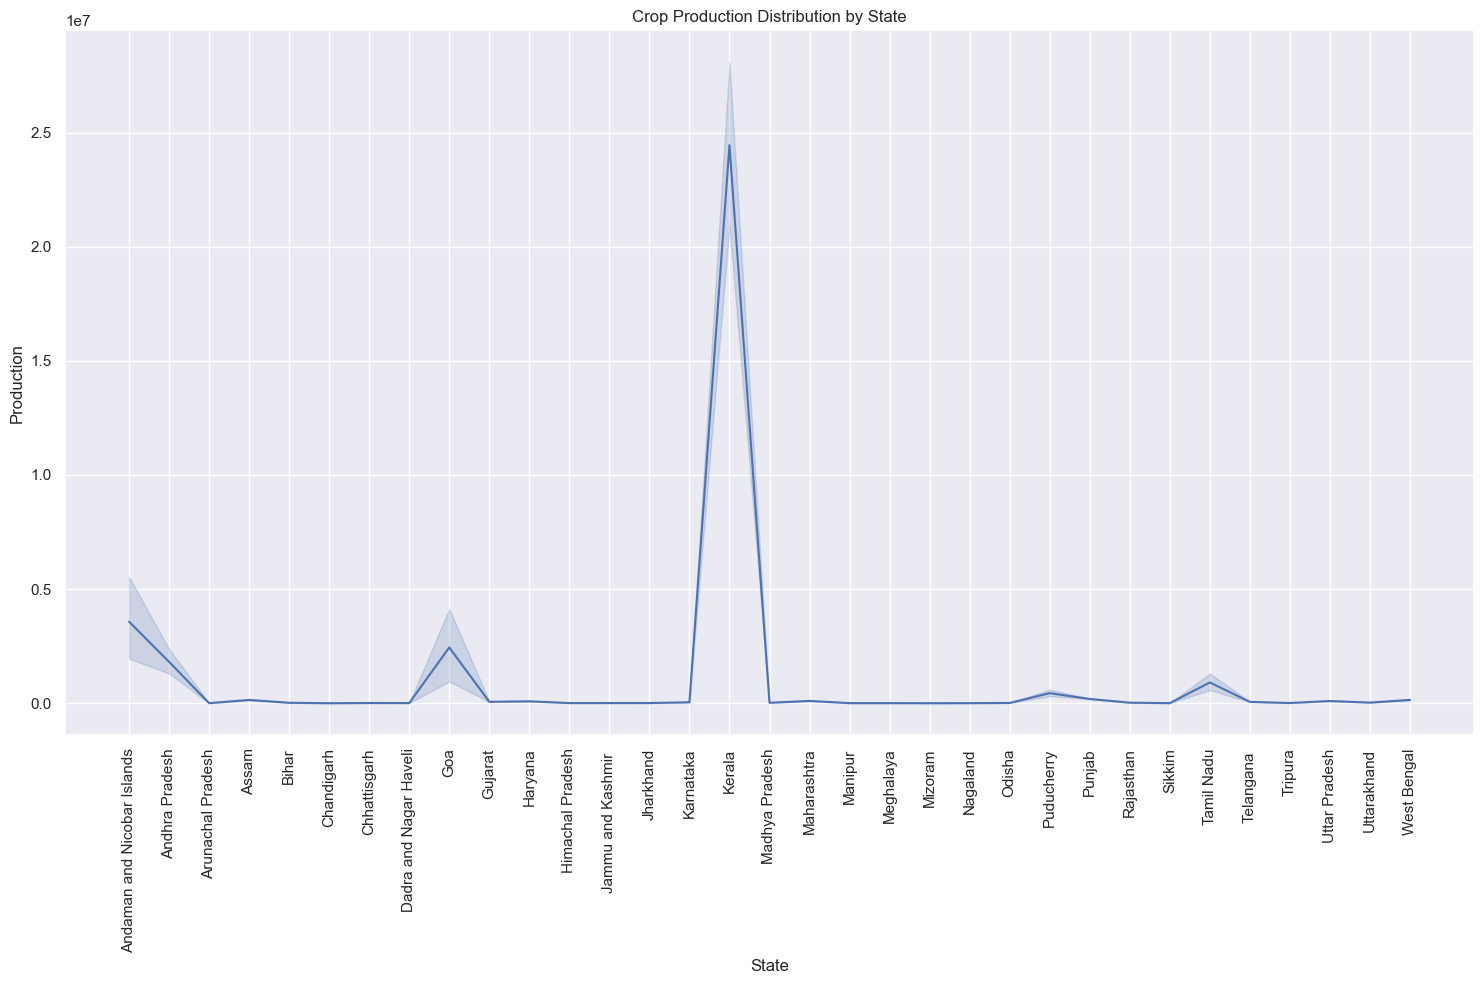

In [93]:
# Get a list of unique states
states = crp_production['State_Name'].unique()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Iterate through states and plot box plot for each state
sns.lineplot(x='State_Name', y='Production', data=crp_production, ax=ax )
ax.set_title('Crop Production Distribution by State')
ax.set_xlabel('State')
ax.set_ylabel('Production')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Year-wise Production of individual State and Union Territory# 

In [94]:
fig, ax = plt.subplots(figsize=(37, 250), sharex='col')

# Plot line chart for each state over the years
count = 1
unique_states = crp_production['State_Name'].unique()
for state in unique_states:
    plt.subplot(len(unique_states), 1, count)
    sns.lineplot(x=crp_production[crp_production['State_Name'] == state]['Crop_Year'],
                 y=crp_production[crp_production['State_Name'] == state]['Production'])
    sns.set(font_scale=2)
    plt.subplots_adjust(hspace=1)
    plt.title(state)
    count += 1

plt.show()

# Crop Production Trends by State

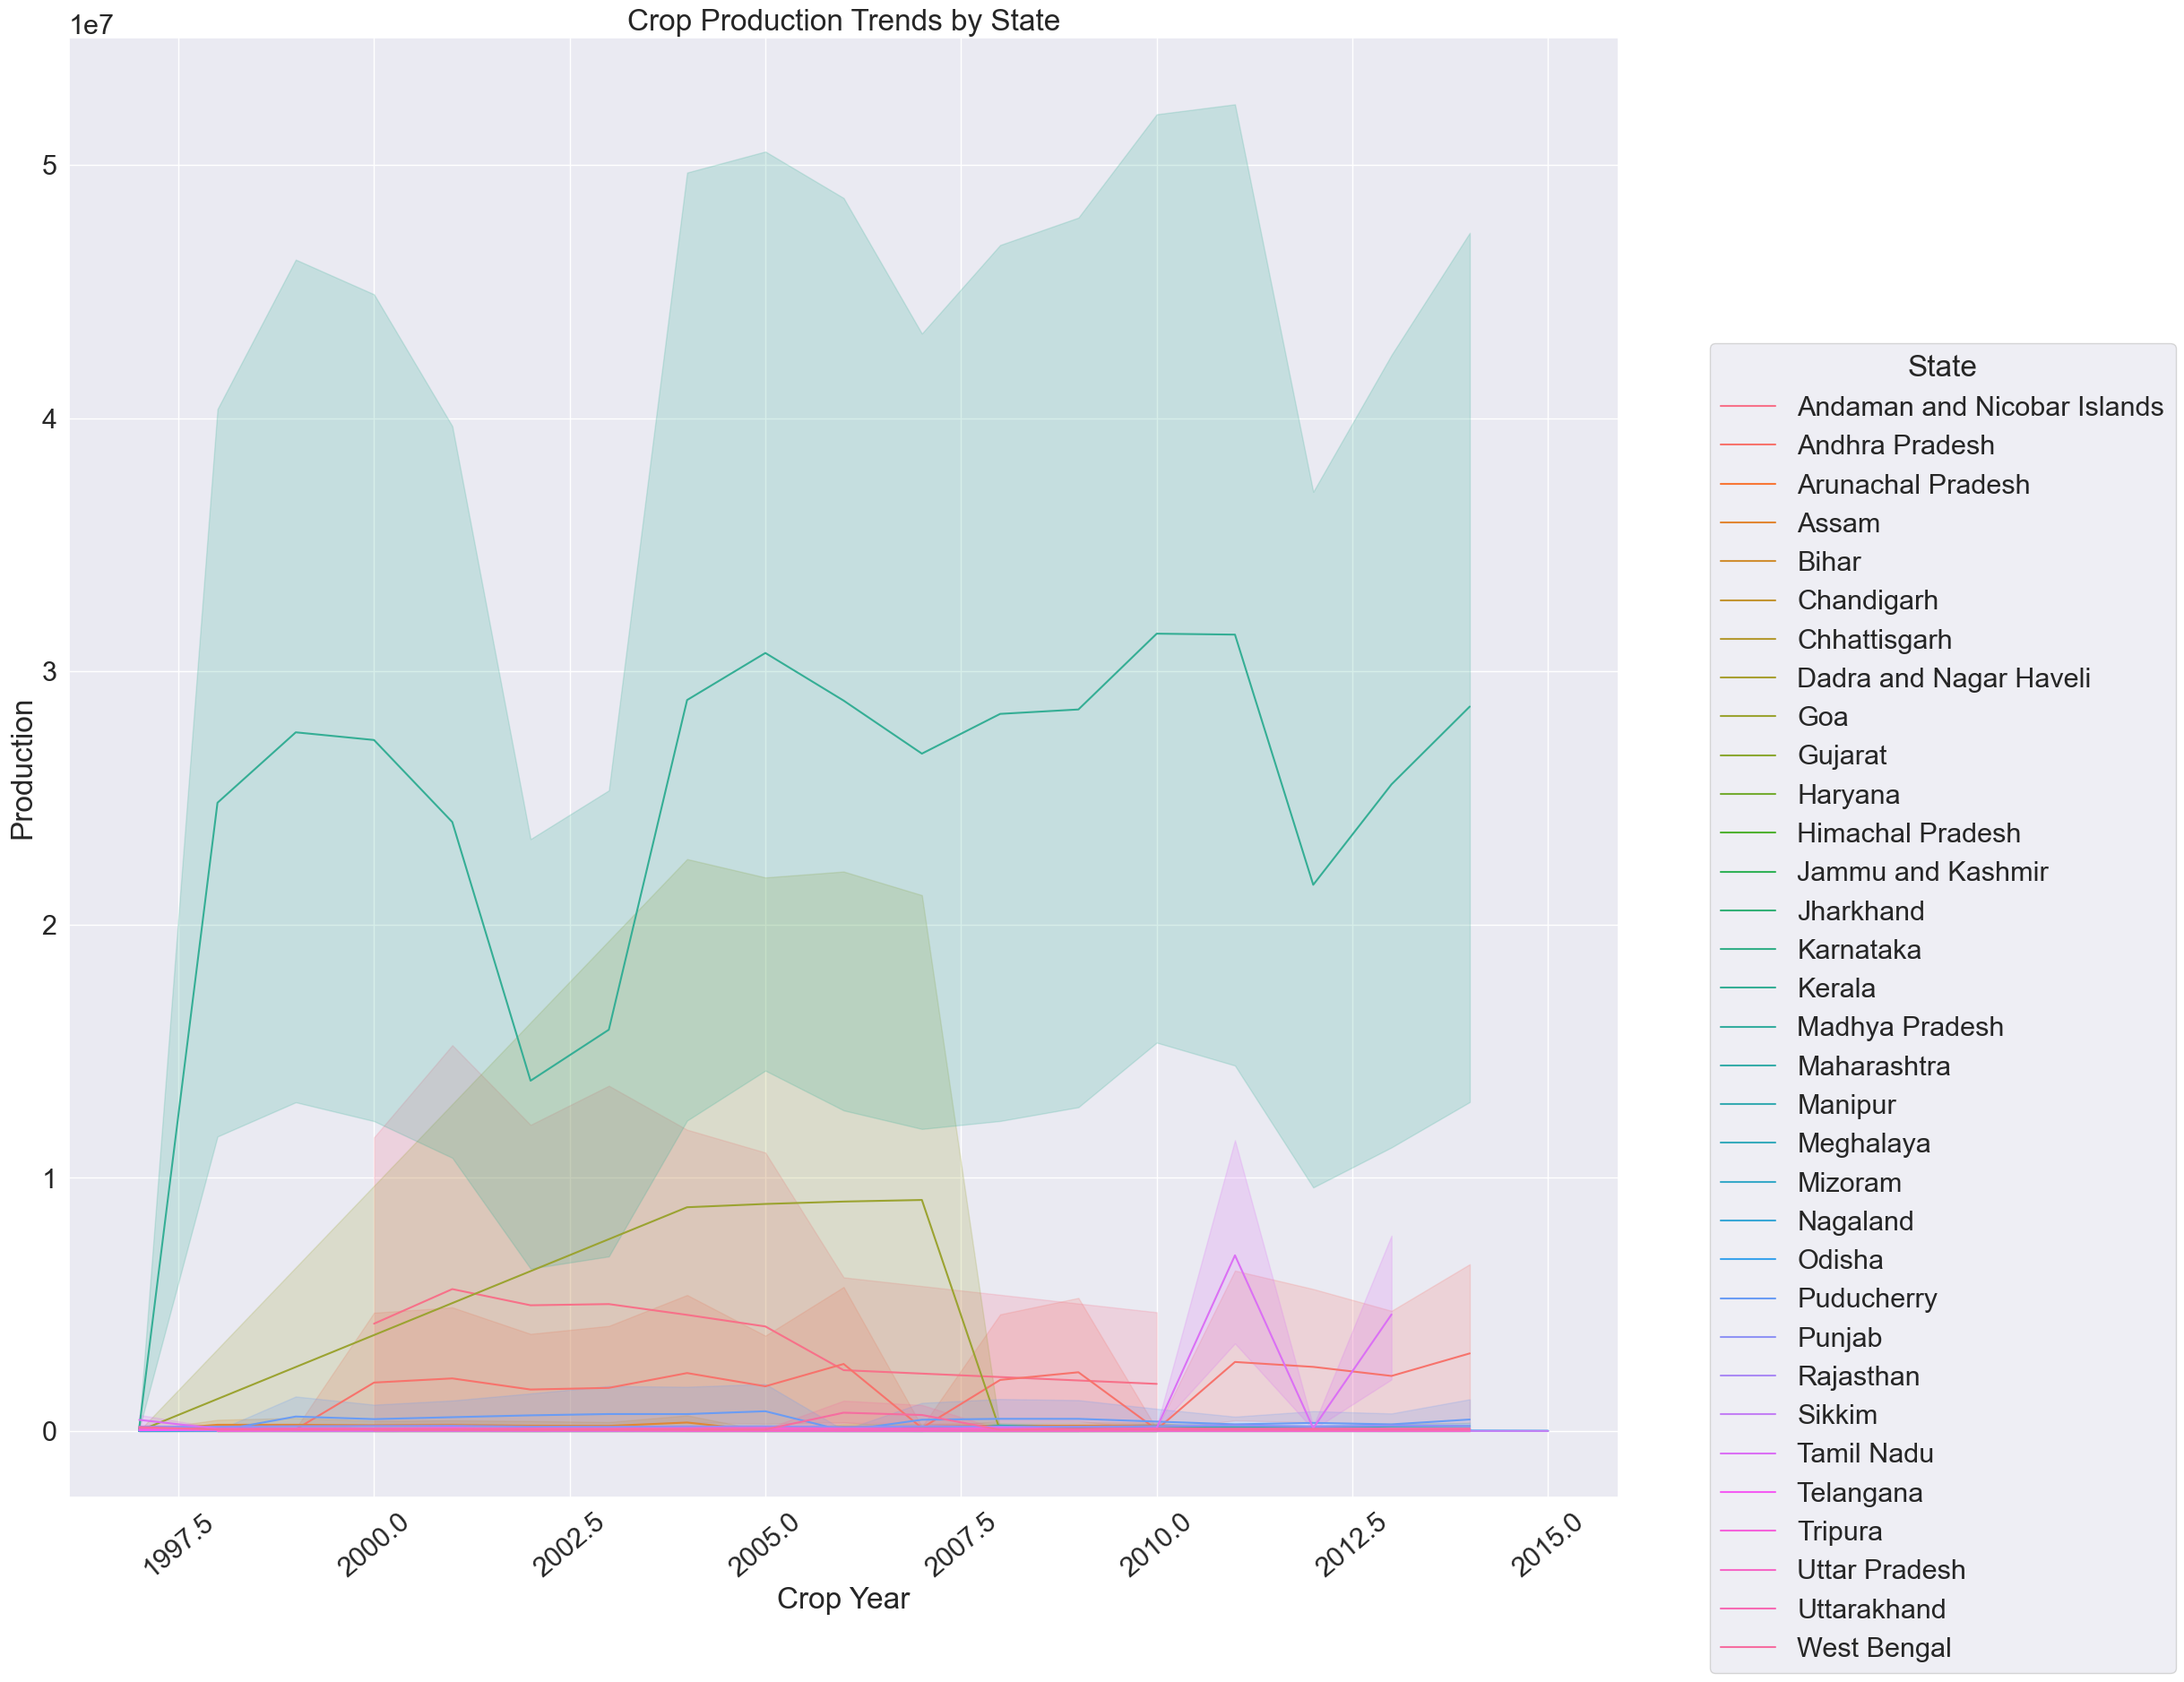

In [111]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(25, 20))

# Plot line chart for each state over the years
sns.lineplot(x='Crop_Year', y='Production', hue='State_Name', data=crp_production,
             ax=ax)

ax.set_title('Crop Production Trends by State')
ax.set_xlabel('Crop Year')
ax.set_ylabel('Production')
ax.legend(title='State', bbox_to_anchor=(1.05, 0.8))
ax.tick_params(axis='x', rotation=40)

plt.tight_layout()
plt.show()

## Top 5 States by Total Crop Production

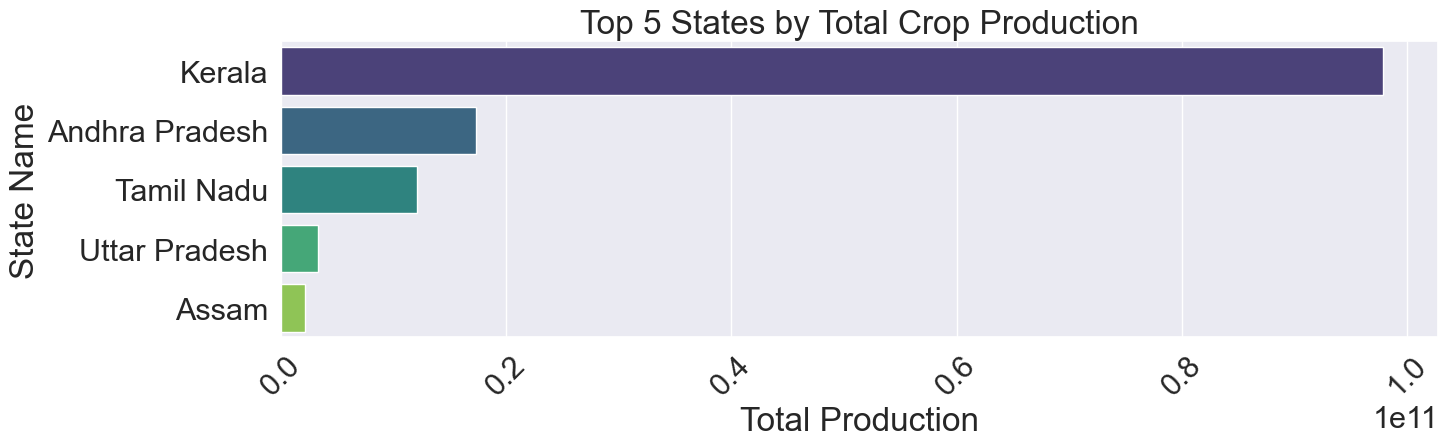

In [112]:
# Assuming state_production is already calculated as you mentioned
state_production = crp_production.groupby('State_Name')['Production'].sum().reset_index()

# Get the top 5 states by total production
top_states = state_production.nlargest(5, 'Production')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the top 5 states by total production
sns.barplot(x='Production', y='State_Name', data=top_states, palette='viridis', ax=ax)

# Customize the plot
ax.set_title('Top 5 States by Total Crop Production')
ax.set_xlabel('Total Production')
ax.set_ylabel('State Name')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Top 10 districts with highest production in last 22 years,

In [118]:
df.groupby(['State_Name',
            'District_Name']).sum().nlargest(10, 'Production')

Crop_Year        Area     Production  \
State_Name     District_Name                                              
Kerala         KOZHIKODE              509419  2988170.95 15280739862.95   
               MALAPPURAM             577581  3200752.57 14518402342.16   
               THIRUVANANTHAPURAM     517386  2211754.88 10022714452.33   
               THRISSUR               545529  2442723.74  9923507679.70   
               KANNUR                 533485  3000089.84  9783432072.12   
Andhra Pradesh EAST GODAVARI         1516502 11593557.00  8271057200.00   
Kerala         KASARAGOD              591636  1865369.44  7732216929.42   
               KOLLAM                 537489  2160103.98  7151945342.26   
               PALAKKAD               748136  3677292.76  6369381578.71   
               ERNAKULAM              541473  1923972.32  5021649325.77   

                                      Yield  
State_Name     District_Name                 
Kerala         KOZHIKODE          122365.10  
               MALAPPURAM         137560.29  
               THIRUVANANTHAPURAM 128558.09  
               THRISSUR           119642.92  
               KANNUR             112697.83  
Andhra Pradesh EAST GODAVARI      171711.65  
Kerala         KASARAGOD          136044.73  
               KOLLAM             113858.64  
               PALAKKAD           115103.65  
               ERNAKULAM           95087.41

### Production of the major crops 

In [119]:
df.groupby('Crop')['Production'].sum().reset_index().sort_values(
    by='Production', ascending=False)


Crop      Production
28             Coconut  129981629216.29
106           Sugarcane   5535681525.92
95                 Rice   1605470383.37
119               Wheat   1332825656.80
87               Potato    424826343.86
..                  ...             ...
71   Other Citrus Fruit            0.00
35             Cucumber            0.00
58               Litchi            0.00
54              Lab-Lab            0.00
0                 Apple            0.00

[124 rows x 2 columns]

### Total Production by Top 5 Crops

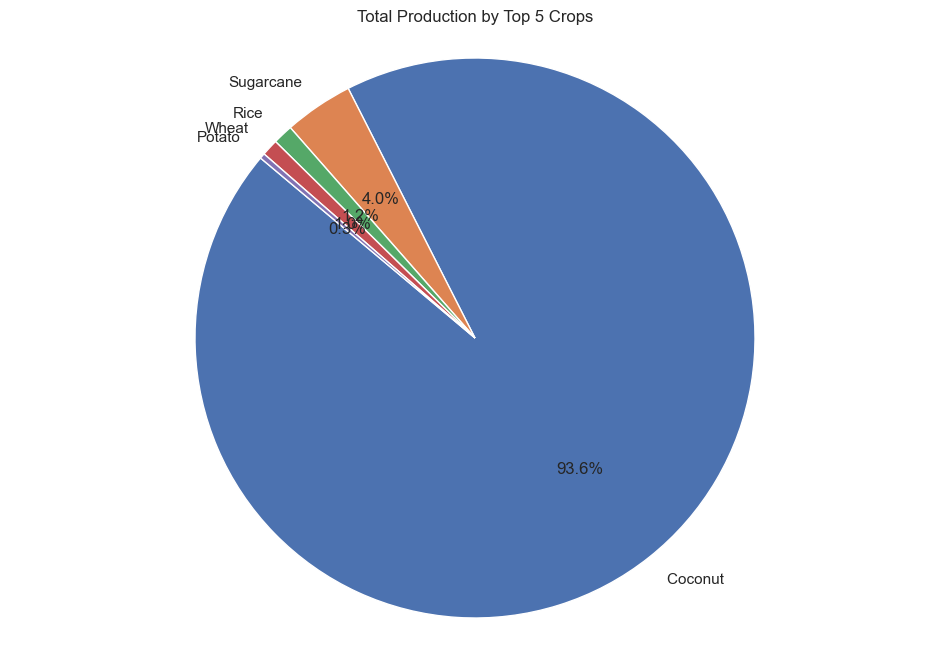

In [120]:
d = crp_production.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)


top_5_crops = d.head(5)


plt.figure(figsize=(12, 8))
plt.pie(top_5_crops['Production'], labels=top_5_crops['Crop'], autopct='%1.1f%%', startangle=140)
plt.title('Total Production by Top 5 Crops')
plt.axis('equal') 

plt.show()

### Rice Production in all States 

In [128]:
rice = df[df['Crop'] == 'Rice']
rice

State_Name District_Name  Crop_Year       Season  \
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
12      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
18      Andaman and Nicobar Islands      NICOBARS       2002  Kharif        
27      Andaman and Nicobar Islands      NICOBARS       2003  Kharif        
36      Andaman and Nicobar Islands      NICOBARS       2004  Kharif        
...                             ...           ...        ...          ...   
246049                  West Bengal       PURULIA       2013  Summer        
246052                  West Bengal       PURULIA       2013  Winter        
246058                  West Bengal       PURULIA       2014  Autumn        
246086                  West Bengal       PURULIA       2014  Summer        
246089                  West Bengal       PURULIA       2014  Winter        

        Crop      Area  Production  Yield  
2       Rice    102.00      321.00   3.15  
12      Rice     83.00      300.00   3.61  
18      Rice    189.20      510.84   2.70  
27      Rice     52.00       90.17   1.73  
36      Rice     52.94       72.57   1.37  
...      ...       ...         ...    ...  
246049  Rice    516.00     1274.00   2.47  
246052  Rice 302274.00   730136.00   2.42  
246058  Rice    264.00      721.00   2.73  
246086  Rice    306.00      801.00   2.62  
246089  Rice 279151.00   597899.00   2.14  

[15082 rows x 8 columns]

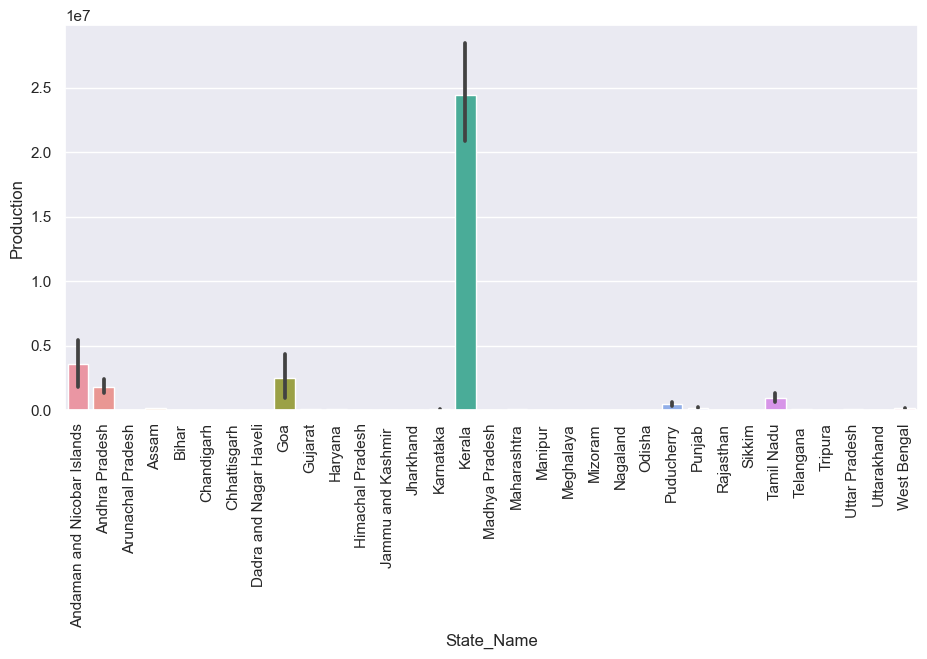

In [122]:
plt.figure(figsize=(11, 5))
sns.barplot(x='State_Name', y='Production', data=crp_production)
plt.xticks(rotation=90)
plt.show()

## Top 5 States in Rice Production

District_Name  Production
58        BARDHAMAN 34239976.00
374  MEDINIPUR WEST 29192719.00
612   WEST GODAVARI 27845309.00
169   EAST GODAVARI 24690929.00
494         SANGRUR 24448000.00

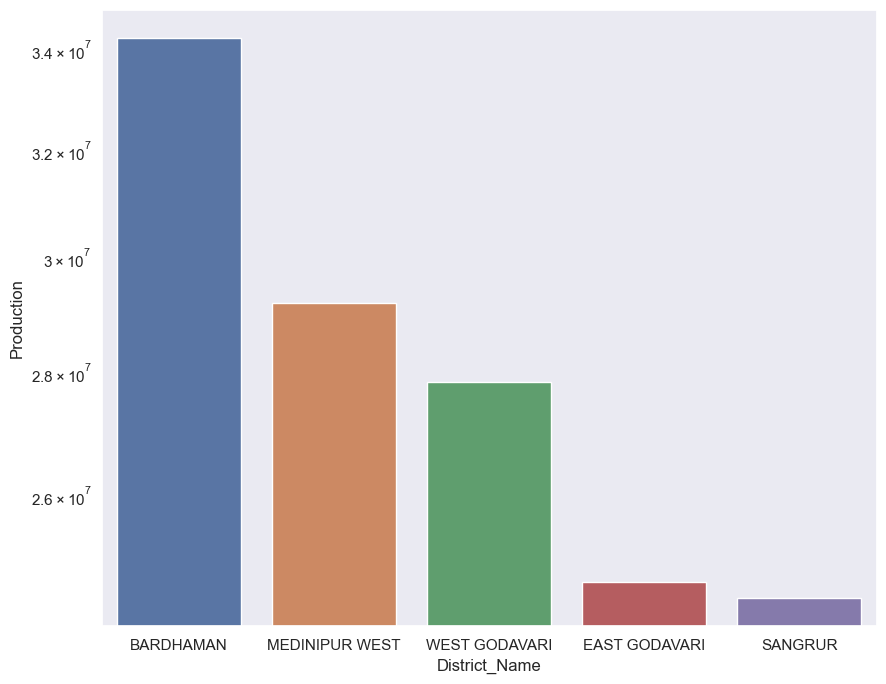

In [123]:
DF = rice.copy()
DF = DF.groupby(
    by='District_Name')['Production'].sum().reset_index().sort_values(
        by='Production', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF['District_Name'].head(),
            y=DF['Production'].head(),
            errwidth=2)
sns.set(font_scale=1)
plt.yscale('log')
DF.head()

## Year,

In [156]:
df['Crop_Year'].nunique()

19

In [159]:
df['Crop_Year'].value_counts().sort_values()

2015      561
1997     8899
2014    10815
1998    11262
1999    12441
2012    13184
2001    13293
2013    13475
2005    13519
2000    13553
2009    13767
2011    13791
2010    13793
2004    13858
2006    13976
2008    14230
2007    14269
2002    16536
2003    17139
Name: Crop_Year, dtype: int64

## Year Vs Production

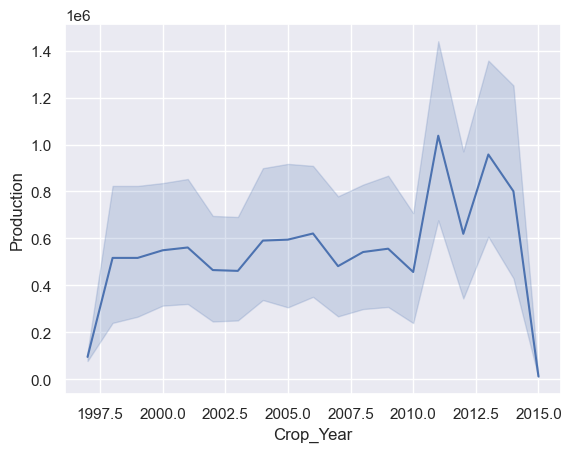

In [161]:
sns.lineplot(x=df['Crop_Year'], y=df['Production'])
plt.show()

## Season,

In [162]:
df['Season'].value_counts()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

## Season based production

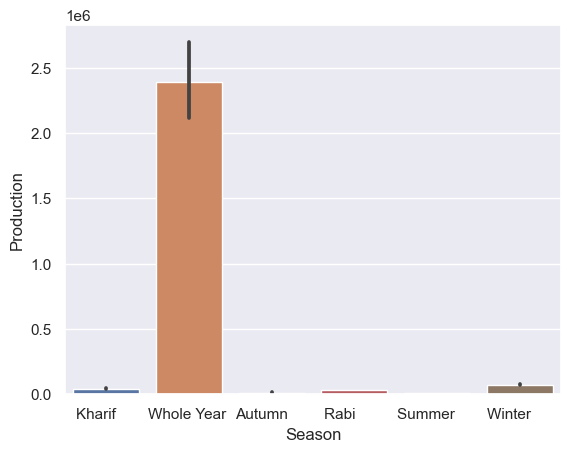

In [164]:
sns.barplot(x=df['Season'], y=df['Production'])
plt.show()


## SEASON Vs PRODUCTION OF RICE

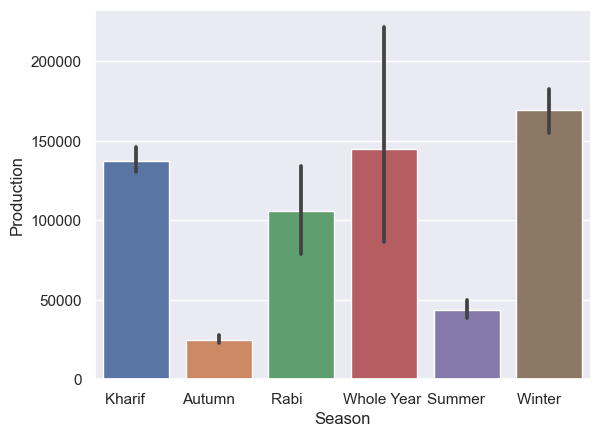

In [166]:
sns.barplot(x='Season', y='Production', data=rice, ci=100)
sns.set(font_scale=1)


In [124]:
crp_production.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Yield'],
      dtype='object')

In [125]:
print(crp_production.dtypes)

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
Yield            float64
dtype: object


# Dealing with categorical features

# Using One hot encoding,

In [141]:
crp_production['State_Name'] = crp_production['State_Name'].astype('category').cat.codes + 1
crp_production['District_Name'] = crp_production['District_Name'].astype('category').cat.codes + 1
crp_production['Season'] = crp_production['Season'].astype('category').cat.codes + 1
crp_production['Crop'] = crp_production['Crop'].astype('category').cat.codes + 1

print(crp_production)


        State_Name  District_Name  Crop_Year  Season  Crop      Area  \
0                1            428       2000       2     3   1254.00   
1                1            428       2000       2    75      2.00   
2                1            428       2000       2    96    102.00   
3                1            428       2000       5     8    176.00   
4                1            428       2000       5    23    720.00   
...            ...            ...        ...     ...   ...       ...   
246086          33            472       2014       4    96    306.00   
246087          33            472       2014       4   103    627.00   
246088          33            472       2014       5   107    324.00   
246089          33            472       2014       6    96 279151.00   
246090          33            472       2014       6   103    175.00   

        Production  Yield  
0          2000.00   1.59  
1             1.00   0.50  
2           321.00   3.15  
3           641.00   3.

# Defining predictor variable(x) and response variable(y)

In [142]:
data1=crp_production.drop(['Production'],axis=1)
data1

State_Name  District_Name  Crop_Year  Season  Crop      Area  Yield
0                1            428       2000       2     3   1254.00   1.59
1                1            428       2000       2    75      2.00   0.50
2                1            428       2000       2    96    102.00   3.15
3                1            428       2000       5     8    176.00   3.64
4                1            428       2000       5    23    720.00   0.23
...            ...            ...        ...     ...   ...       ...    ...
246086          33            472       2014       4    96    306.00   2.62
246087          33            472       2014       4   103    627.00   0.74
246088          33            472       2014       5   107    324.00  50.15
246089          33            472       2014       6    96 279151.00   2.14
246090          33            472       2014       6   103    175.00   0.50

[242361 rows x 7 columns]

In [143]:
data2=crp_production['Production']
data2

0          2000.00
1             1.00
2           321.00
3           641.00
4           165.00
            ...   
246086      801.00
246087      463.00
246088    16250.00
246089   597899.00
246090       88.00
Name: Production, Length: 242361, dtype: float64

# Splitting the dataset into training and testing dataset

In [144]:
X_train, X_test, y_train, y_test = train_test_split(data1, data2, test_size=0.2, random_state=42)


# Fitting different regression models and comparing their performance

In [167]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
from sklearn.model_selection import learning_curve

chosen_regressors = [
    'RandomForestRegressor', 'BaggingRegressor', 'XGBRegressor',
    'GradientBoostingRegressor', 'AdaBoostRegressor', 'DecisionTreeRegressor',
    'SGDRegressor', 'LinearRegression', 'LassoCV', 'RidgeCV', 'BayesianRidge',
    'ElasticNetCV'
]

REGRESSORS = [
    est for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]

In [25]:
reg = LazyRegressor(verbose=1,
                    ignore_warnings=False,
                    custom_metric=None,
                    regressors=REGRESSORS)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  9%|███████▌                                                                           | 1/11 [00:04<00:46,  4.68s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6725439164496152, 'Adjusted R-Squared': 0.6725033779999535, 'RMSE': 11478151.49692374, 'Time taken': 4.683985948562622}


 18%|███████████████                                                                    | 2/11 [00:15<01:13,  8.14s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8974695343671028, 'Adjusted R-Squared': 0.897456841287546, 'RMSE': 6422762.836665121, 'Time taken': 10.564489126205444}


 27%|██████████████████████▋                                                            | 3/11 [00:15<00:37,  4.64s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.00780965873101247, 'Adjusted R-Squared': 0.007686827425610554, 'RMSE': 19979881.975016564, 'Time taken': 0.4647634029388428}


 36%|██████████████████████████████▏                                                    | 4/11 [00:17<00:23,  3.36s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8168847972182115, 'Adjusted R-Squared': 0.8168621278991695, 'RMSE': 8583365.813690469, 'Time taken': 1.4054489135742188}


 45%|█████████████████████████████████████▋                                             | 5/11 [00:18<00:15,  2.55s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 8.445175577342923e-05, 'Adjusted R-Squared': -3.93359157790929e-05, 'RMSE': 20057512.970225018, 'Time taken': 1.1221435070037842}


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:36<00:39,  7.82s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7273908621303957, 'Adjusted R-Squared': 0.7273571136298548, 'RMSE': 10472867.900793118, 'Time taken': 18.04350781440735}


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:37<00:22,  5.64s/it]

{'Model': 'LassoCV', 'R-Squared': 0.007580992866709324, 'Adjusted R-Squared': 0.0074581332529017885, 'RMSE': 19982184.181351192, 'Time taken': 1.1455678939819336}


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:37<00:11,  3.94s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.007836469677416913, 'Adjusted R-Squared': 0.007713641691159845, 'RMSE': 19979612.025218956, 'Time taken': 0.3124358654022217}


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [02:09<01:03, 31.50s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9116288127167155, 'Adjusted R-Squared': 0.9116178725292913, 'RMSE': 5962807.181935609, 'Time taken': 92.0815589427948}


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [02:10<00:21, 21.89s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.007835970470702391, 'Adjusted R-Squared': 0.007713142422644537, 'RMSE': 19979617.051585536, 'Time taken': 0.37833142280578613}


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [02:31<00:00, 13.76s/it]

{'Model': 'SGDRegressor', 'R-Squared': -276403524900.1357, 'Adjusted R-Squared': -276437743138.68243, 'RMSE': 10545500813894.69, 'Time taken': 21.137200355529785}


In [175]:
models

Adjusted R-Squared        R-Squared  \
Model                                                            
RandomForestRegressor                    0.91             0.91   
BaggingRegressor                         0.90             0.90   
DecisionTreeRegressor                    0.82             0.82   
GradientBoostingRegressor                0.73             0.73   
AdaBoostRegressor                        0.67             0.67   
LinearRegression                         0.01             0.01   
RidgeCV                                  0.01             0.01   
BayesianRidge                            0.01             0.01   
LassoCV                                  0.01             0.01   
ElasticNetCV                            -0.00             0.00   
SGDRegressor                 -276437743138.68 -276403524900.14   

                                       RMSE  Time Taken  
Model                                                    
RandomForestRegressor            5962807.18       92.08  
BaggingRegressor                 6422762.84       10.56  
DecisionTreeRegressor            8583365.81        1.41  
GradientBoostingRegressor       10472867.90       18.04  
AdaBoostRegressor               11478151.50        4.68  
LinearRegression                19979612.03        0.31  
RidgeCV                         19979617.05        0.38  
BayesianRidge                   19979881.98        0.46  
LassoCV                         19982184.18        1.15  
ElasticNetCV                    20057512.97        1.12  
SGDRegressor              10545500813894.69       21.14

# Random Forest Regression Model

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

Mean Squared Error: 5689372280204.752
R-squared: 0.9858592152813916
         Actual  Predicted
51163   4529.00    4544.17
55141    425.00     423.96
104122   254.00     256.98
161230     7.00       7.00
229232   130.00     129.32
...         ...        ...
181723   212.00     212.17
140533   182.00     180.71
113952    42.00      41.76
148435 16070.60   16068.39
223796     1.00       1.00

[48473 rows x 2 columns]


## Plot between the actual and predicted values

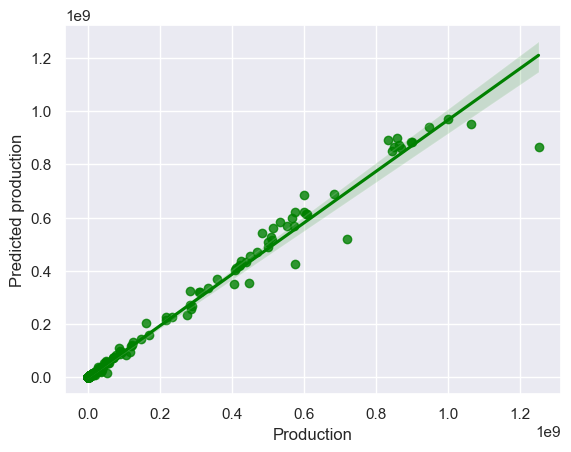

In [149]:
y_predict = rf.predict(X_test)
sns.regplot(x=y_test, y=y_predict, color='Green')
plt.ylabel('Predicted production')
plt.show()

## Comparing the predicting and actual values

In [154]:
Predicted = pd.DataFrame()
Predicted['Production_true'] = y_test
Predicted['Production_predicted'] = rf.predict(X_test)


print(Predicted.head(10))

        Production_true  Production_predicted
51163           4529.00               4544.17
55141            425.00                423.96
104122           254.00                256.98
161230             7.00                  7.00
229232           130.00                129.32
235076            21.00                 21.07
219586         98392.00              99101.66
54184            182.00                179.38
6591             835.00                839.10
33355            190.00                190.94


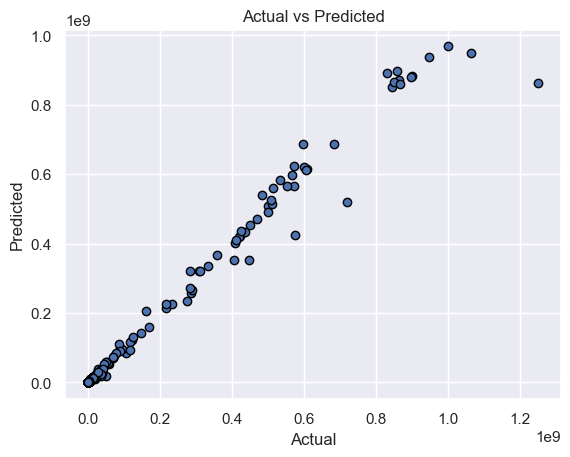

In [185]:
fig, ax = plt.subplots()

ax.scatter(y_test,
          rf.predict(X_test),
           edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()